# Kmeans

In [78]:
import pandas as pd
import numpy as np
from numpy import random
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib
import copy

In [3]:
complete_customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data = complete_customer_data.iloc[:,3:5]
samples, features = customer_data.shape
customer_datan=customer_data.to_numpy()

In [5]:
#mention no. of clusters
K = 5

In [6]:
#initialize centroid
def init_centroid(samples, features, customer_datan,K):
    centroid = []
    for i in range(K):
        rand = random.randint(samples)
        centroid.append(customer_datan[rand])
    return np.array(centroid)

In [7]:
#calculate distance for all
def cal_dist(customer_datan, samples, centroid, features, K):
    dist = np.zeros((samples, K))
    for k in range(K):
        for i in range(samples):
            sum = 0
            for j in range(features):
                sum+= (customer_datan[i][j] - centroid[k][j])**2
            dist[i][k] = sqrt(sum)
    return dist

In [8]:
#calculate new centroid
def cal_centroid(dataset,K,centroid):
    for i in range(K):
        rows = np.where(dataset[:,2]==i)
        centroid[i] = np.reshape((np.mean(dataset[rows],axis=0)),(1,3))[:,[0,1]]
    return centroid
    

In [97]:
centroid = init_centroid(samples, features,customer_datan,K)
dist = cal_dist(customer_datan, samples, centroid, features, K)
min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
dataset = np.append(customer_datan,min_dist_index,axis=1)

for i in range(100):
    old_centroid = copy.deepcopy(centroid)
    dist = cal_dist(customer_datan, samples, centroid, features, K)
    min_dist_index = np.reshape(np.argmin(dist, axis=1),(samples,1))
    dataset = np.append(customer_datan,min_dist_index,axis=1)
    centroid = cal_centroid(dataset,K,centroid)
    if np.array_equal(old_centroid,centroid):
        print(i)
        break
    


5


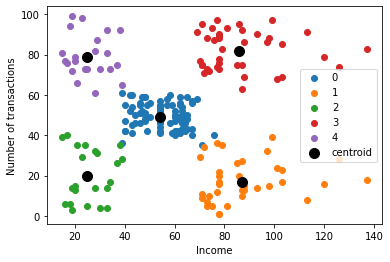

In [98]:
colors = ['red','green','blue','purple','pink']
for i in range(K):
    x=dataset[np.where(dataset[:,2]==i)]
    plt.scatter(x[:,0], x[:,1], label = i)
plt.scatter(centroid[:,0],centroid[:,1],s=100,c='black',label='centroid')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()